<a href="https://colab.research.google.com/github/ThiagoLozano/Alura_Imersao-de-Dados-2-Edicao/blob/main/Aula001_Desafios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importa a Biblioteca Pandas, Matplotlib e Seaborn.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Pega a fonte dos dados.
fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"

# Cria o objeto 'dados'.
dados = pd.read_csv(fonte)

In [ ]:
# Retorna o nome de todas as colunas.
for c in dados.columns:
  print(c, end=' | ')

NU_INSCRICAO | NU_ANO | CO_MUNICIPIO_RESIDENCIA | NO_MUNICIPIO_RESIDENCIA | CO_UF_RESIDENCIA | SG_UF_RESIDENCIA | NU_IDADE | TP_SEXO | TP_ESTADO_CIVIL | TP_COR_RACA | TP_NACIONALIDADE | CO_MUNICIPIO_NASCIMENTO | NO_MUNICIPIO_NASCIMENTO | CO_UF_NASCIMENTO | SG_UF_NASCIMENTO | TP_ST_CONCLUSAO | TP_ANO_CONCLUIU | TP_ESCOLA | TP_ENSINO | IN_TREINEIRO | CO_ESCOLA | CO_MUNICIPIO_ESC | NO_MUNICIPIO_ESC | CO_UF_ESC | SG_UF_ESC | TP_DEPENDENCIA_ADM_ESC | TP_LOCALIZACAO_ESC | TP_SIT_FUNC_ESC | IN_BAIXA_VISAO | IN_CEGUEIRA | IN_SURDEZ | IN_DEFICIENCIA_AUDITIVA | IN_SURDO_CEGUEIRA | IN_DEFICIENCIA_FISICA | IN_DEFICIENCIA_MENTAL | IN_DEFICIT_ATENCAO | IN_DISLEXIA | IN_DISCALCULIA | IN_AUTISMO | IN_VISAO_MONOCULAR | IN_OUTRA_DEF | IN_GESTANTE | IN_LACTANTE | IN_IDOSO | IN_ESTUDA_CLASSE_HOSPITALAR | IN_SEM_RECURSO | IN_BRAILLE | IN_AMPLIADA_24 | IN_AMPLIADA_18 | IN_LEDOR | IN_ACESSO | IN_TRANSCRICAO | IN_LIBRAS | IN_TEMPO_ADICIONAL | IN_LEITURA_LABIAL | IN_MESA_CADEIRA_RODAS | IN_MESA_CADEIRA_SEPARAD

In [228]:
# DESAFIO 01 #

# Retorna a 'Idade' , 'Quantidade' e seu 'Percetual'.
quantidade = dados["NU_IDADE"].value_counts()                                   # Pega a quantidade de valores repetidos.
percento = dados["NU_IDADE"].value_counts(normalize=True).round(4) * 100        # Multiplica a quantidade por 100 e arredonda.
tabela = pd.DataFrame({"Quantidade": quantidade, "Percentual(%)": percento})    # Cria o DataFrame 'Quantidade' e 'Percentual'.
tabela.rename_axis('Idade', axis=1, inplace=True)                               # Coloca a Coluna 'Idade' na primeira posição.
tabela

Idade,Quantidade,Percentual(%)
18,21452,16.84
17,21256,16.69
19,14418,11.32
20,10413,8.17
16,7830,6.15
...,...,...
75,2,0.00
73,2,0.00
82,1,0.00
77,1,0.00


In [ ]:
# DEAFIO 2 #

# Retorna a 'Idade' a 'Sigla do Estado' e 'Qual Cidade' tem registro de candidados com 13 anos.
dados.query("NU_IDADE == 13")[['NU_IDADE', 'SG_UF_RESIDENCIA', 'NO_MUNICIPIO_RESIDENCIA']]

,NU_IDADE,SG_UF_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA
57359,13,SP,Atibaia
95630,13,MT,Rondonópolis
98197,13,AP,Macapá
116501,13,BA,Jacobina


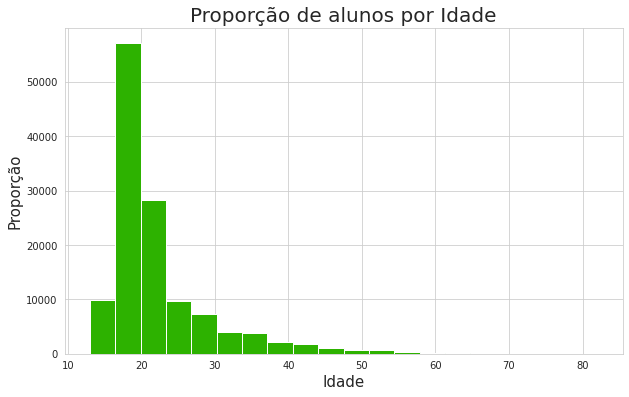

In [266]:
# DESAFIO 3 #

d = dados['NU_IDADE']                                                   # Atribui os dados da coluna no objeto 'd'.
plt.figure(figsize=(10,6))                                              # Tamanho da imagem.
plt.hist(d, bins=(20), color='#2DB200')                                 # Configurações do Gráfico.
plt.title('Proporção de alunos por Idade',fontdict={'fontsize': 20})    # Título principal do Gráfico.
plt.xlabel('Idade',fontdict={'fontsize': 15})                           # Título da coordenada X.
plt.ylabel('Proporção',fontdict={'fontsize': 15})                       # Título da coodenada Y.
plt.show()                                                              # Mostra o Gráfico.
plt.close()                                                             # Fecha a ação.

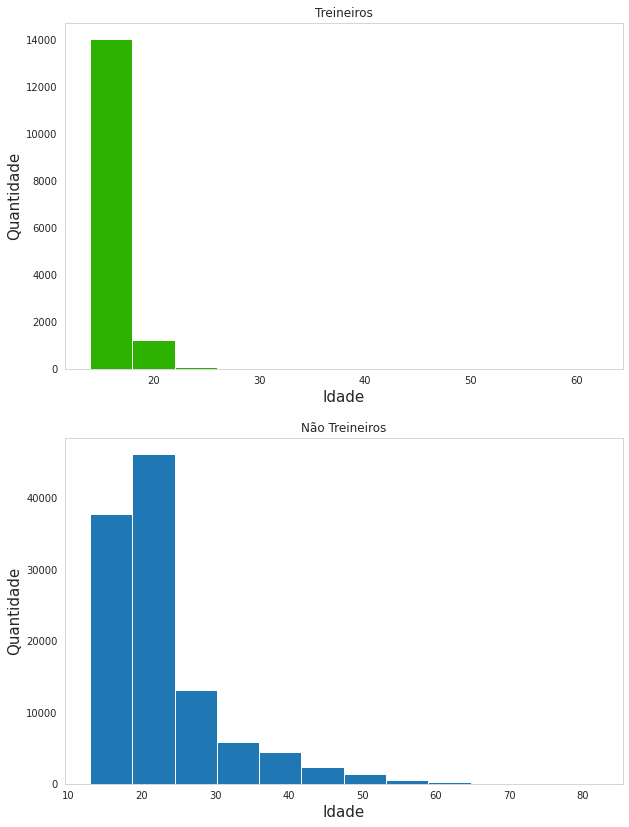

In [269]:
# DESAFIO 4 #

treineiros = dados.query("IN_TREINEIRO == 1")["NU_IDADE"]     # Treineiros.
nao_treineiros= dados.query("IN_TREINEIRO == 0")["NU_IDADE"]  # Não Treineiros.

plt.figure(figsize=(10, 14))                                                                     # Tamanho da Imagem.
plt.subplot(211)                                                                                 # Subplot.
treineiros_idade.plot(kind='hist', grid=False, bins=12, title='Treineiros', color='#2DB200')     # Configurações do Gráfico.
plt.xlabel('Idade',fontdict={'fontsize': 15})                                                    # Título da coordenada X.
plt.ylabel('Quantidade',fontdict={'fontsize': 15})                                               # Título da coordenada Y.

plt.subplot(212)                                                                     # Subplot.
n_treineiros_idade.plot(kind='hist', grid=False, bins=12, title='Não Treineiros')    # Configurações do Gráfico.
plt.xlabel('Idade',fontdict={'fontsize': 15})                                        # Título da coordenada X.
plt.ylabel('Quantidade',fontdict={'fontsize': 15})                                   # Título da coordenada Y.
plt.show()                                                                           # Executa o Gráfico.

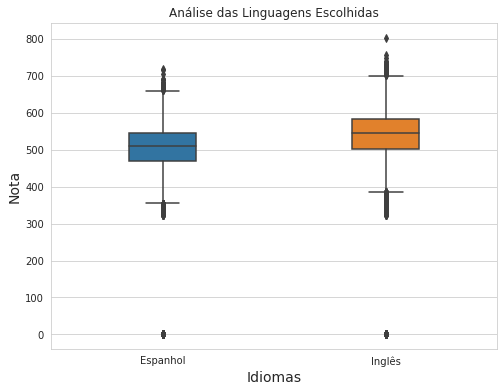

In [267]:
# Desafio 5 #

linguas = dados["TP_LINGUA"]                                                        # Pega a tabela de Linguas.
linguas.replace({0: 'Inglês', 1: 'Espanhol'}, inplace=True)                         # Trocas 0 para 'Inglês' e 1 para 'Espanhol'.
notas = pd.concat([dados["NU_NOTA_LC"].to_frame(), linguas.to_frame()], axis=1)     # Concatena a Nota com a Linguagem escolhida.

sns.set_style("whitegrid")                                                          # Estilo do Gráfico.
fig, ax = plt.subplots(figsize=(8,6))                                               # Tamanho do Gráfico.
sns.boxplot(x="TP_LINGUA", y="NU_NOTA_LC", data=notas, width=0.3)                   # Cria o Gráfico 'Boxplot'.
ax.xaxis.set_label_text("Idiomas", fontdict={'fontsize': 14})                       # Título da coordenada X.
ax.yaxis.set_label_text("Nota", fontdict={'fontsize': 14})                          # Título da coordenada Y.
ax.set_title("Análise das Linguagens Escolhidas")                                   # Título Princpal do Gráfico.
plt.show()                                                                          # Executa o Gráfico.

***Desafios***

**Desafio 01:** Proporção dos inscritos por idade.

**Desafio 02:** Descobrir de quais estados são os inscritos de 13 anos.

**Desafio 03:** Adicionar título no gráfico.

**Desafio 04:** Plotar os Histogramas das idades dos treineiros e não treineiros.

**Desafio 05:** Comparar as distribuições das provas em Inglês e Espanhol.